# Testing the GO term reduncancy reduction pipeline with all transporters from Uniprot

In [2]:
from subpred.util import load_df
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(rc={"figure.figsize": (10, 6)})
pd.set_option("display.max_rows", 500)

Some parameters:

In [3]:
ORGANISM_IDS = None  # {559292}  # TODO clustering, adjust parameters
# ORGANISM_IDS = None
SWISSPROT_ONLY = False  # does not make a difference for yeast
MAX_SEQUENCE_EVIDENCE_CODE = 2
EXCLUDE_IEA_GO_TERMS = False
REMOVE_PROTEINS_WITHOUT_GENE_NAMES = False  # Does not make a difference for yeast

Creating the dataset, first without clustering and with transcript-only data:

In [4]:
from subpred.transmembrane_transporters import get_transmembrane_transporter_dataset

# With organisms other than yeast, it might be interesting to cluster at 100% sequence similarity at the beginning
df_sequences, df_uniprot_goa, df_go_chebi = get_transmembrane_transporter_dataset(
    organism_ids=ORGANISM_IDS,
    swissprot_only=SWISSPROT_ONLY,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=EXCLUDE_IEA_GO_TERMS,
    max_sequence_evidence_code=MAX_SEQUENCE_EVIDENCE_CODE,
    remove_proteins_without_gene_names=REMOVE_PROTEINS_WITHOUT_GENE_NAMES,
)
display(df_sequences)
display(df_uniprot_goa)
display(df_go_chebi)

,sequence,reviewed,protein_existence,organism_id,protein_names
Uniprot,,,,,
B7U540,MTAASRANPYSIVSLEEDGLHLVTMSGANGFGNGKVHTRRRCRNRF...,True,1,9606,Inward rectifier potassium channel 18 (Inward ...
O00168,MASLGHILVFCVGLLTMAKAESPKEHDPFTYDYQSLQIGGLVIAGI...,True,1,9606,Phospholemman (FXYD domain-containing ion tran...
O00337,MENDPSRRRESISLTPVAKGLENMGADFLESLEEGQLPRSDLSPAE...,True,1,9606,Sodium/nucleoside cotransporter 1 (Concentrati...
O00400,MSPTISHKDSSRQRRPGNFSHSLDMKSGPLPPGGWDDSHLDSAGRE...,True,1,9606,Acetyl-coenzyme A transporter 1 (AT-1) (Acetyl...
O14925,MEGGGGSGNKTTGGLAGFFGAGGAGYSHADLAGVPLTGMNPLSPYL...,True,1,9606,Mitochondrial import inner membrane translocas...
...,...,...,...,...,...
X5IHB7,MGPLHVPSSSPQHSKLQRVYHLLLFHVHPFWVQLLYFLFISLFGFL...,False,2,29695,Sodium transporter HKT15
X5II77,MGPLHVPSSSPQHSKLQRVYRLLLFHVHPFWIQLLYFLFISLFGFL...,False,2,29695,Sodium transporter HKT15
X5IYJ3,MGPLHVPSSSPQHSKLQRVYHLLLFHVHPFWVQLLYFLFISLFGFL...,False,2,29695,Sodium transporter HKT15


,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0022829,wide pore channel activity
1,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0022803,passive transmembrane transporter activity
2,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0015267,channel activity
3,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0022857,transmembrane transporter activity
4,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0015288,porin activity
...,...,...,...,...,...,...,...,...
1005409,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0015293,symporter activity
1005410,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0015294,solute:monoatomic cation symporter activity
1005411,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0005343,organic acid:sodium symporter activity
1005412,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0022804,active transmembrane transporter activity


,go_id,go_term,chebi_id,chebi_term,chebi_go_relation,chebi_id_ancestor,chebi_term_ancestor
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:36358,polyatomic ion
1,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33703,amino-acid cation
2,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:24870,ion
3,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:51151,dipolar compound
4,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:36357,polyatomic entity
...,...,...,...,...,...,...,...
24979,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:24431,chemical entity
24980,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:58945,organophosphate oxoanion
24981,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:33582,carbon group molecular entity
24982,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:36359,phosphorus oxoacid derivative


### Analysis

In [5]:
import numpy as np
import pandas as pd
from subpred.cdhit import cd_hit
from subpred.util import load_df
import multiprocessing


def get_stats(df_sequences, df_uniprot_goa):

    df_sequences_merge = df_sequences.join(load_df("uniprot")["gene_names"], how="left")
    df_sequences_merge["has_gene_name"] = ~df_sequences_merge.gene_names.isnull()
    df_sequences_merge = df_sequences_merge.drop(
        ["gene_names", "protein_names"], axis=1
    )

    df_sequences_merge = df_sequences_merge.reset_index().drop_duplicates()
    df_sequences_merge

    df_sequences_goa_merged = pd.merge(
        df_sequences_merge[
            ["Uniprot", "reviewed", "protein_existence", "has_gene_name"]
        ],
        df_uniprot_goa[["Uniprot", "evidence_code", "go_term_ancestor"]],
        on="Uniprot",
        how="inner",
    )
    df_sequences_goa_merged
    df_sequences_goa_merged["evidence_code"] = df_sequences_goa_merged[
        "evidence_code"
    ].transform(lambda x: "computational" if x == "IEA" else "experiment")
    df_sequences_goa_merged["protein_existence_evidence"] = df_sequences_goa_merged[
        "protein_existence"
    ].map({1: "protein_level", 2: "transcript_level"})
    df_sequences_goa_merged = df_sequences_goa_merged.drop("protein_existence", axis=1)
    df_sequences_goa_merged["clustering"] = "None"
    cdhit_cores = min(multiprocessing.cpu_count(), 12)

    for thresh in [50, 70, 90, 100]:
        cluster_representatives = cd_hit(
            df_sequences.sequence, identity_threshold=thresh, n_threads=cdhit_cores
        )

        df_sequences_goa_merged_clustered = (
            df_sequences_goa_merged[
                df_sequences_goa_merged.Uniprot.isin(cluster_representatives)
            ]
            .drop("clustering", axis=1)
            .assign(clustering=thresh)
            .drop_duplicates()
        )

        df_sequences_goa_merged = pd.concat(
            [df_sequences_goa_merged, df_sequences_goa_merged_clustered]
        ).reset_index(drop=True)
    df_sequences_goa_merged = df_sequences_goa_merged.rename(
        columns={
            "evidence_code": "go_evidence",
            "reviewed": "swissprot_reviewed",
            "go_term_ancestor": "go_term",
        }
    )

    df_sequences_goa_merged = df_sequences_goa_merged.drop_duplicates()

    df_stats_transporters = (
        df_sequences_goa_merged.drop("go_term", axis=1)
        .drop_duplicates()
        .groupby(
            [
                "swissprot_reviewed",
                "has_gene_name",
                "go_evidence",
                "protein_existence_evidence",
                "clustering",
            ]
        )
        .apply(np.unique)
        .apply(len)
        .to_frame("n_transporters")
    )

    df_stats_go = (
        df_sequences_goa_merged.drop("Uniprot", axis=1)
        .drop_duplicates()
        .groupby(
            [
                "swissprot_reviewed",
                "has_gene_name",
                "go_evidence",
                "protein_existence_evidence",
                "clustering",
            ]
        )
        .apply(np.unique)
        .apply(len)
        .to_frame("n_terms")
    )
    return df_stats_transporters.join(df_stats_go)

In [6]:
df_stats_uniprot = get_stats(df_sequences, df_uniprot_goa)

cd-hit: clustered .......... sequences into finished clusters at threshold 50
cd-hit: clustered .......... sequences into finished clusters at threshold 70
cd-hit: clustered .......... sequences into finished clusters at threshold 90
cd-hit: clustered .......... sequences into finished clusters at threshold 100


In [7]:
df_sequences_four = df_sequences[
    df_sequences.organism_id.isin([3702, 9606, 83333, 559292])
]
df_uniprot_goa_four = df_uniprot_goa[
    df_uniprot_goa.Uniprot.isin(df_sequences_four.index)
].reset_index(drop=True)
df_stats_four = get_stats(df_sequences_four, df_uniprot_goa_four)

cd-hit: clustered 5837 sequences into 2230 clusters at threshold 50
cd-hit: clustered 5837 sequences into 2842 clusters at threshold 70
cd-hit: clustered 5837 sequences into 3496 clusters at threshold 90
cd-hit: clustered 5837 sequences into 5226 clusters at threshold 100


In [8]:
df_stats_four.rename(
    columns={"n_transporters": "n_transporters_four", "n_terms": "n_terms_four"}
).join(
    df_stats_uniprot.rename(
        columns={"n_transporters": "n_transporters_all", "n_terms": "n_terms_all"}
    )
)[
    ["n_transporters_four", "n_transporters_all", "n_terms_four", "n_terms_all"]
]

n_transporters_four  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                        
False              False         computational protein_level              50                            1   
                                                                          70                            1   
                                                                          90                            5   
                                                                          100                           9   
                                                                          None                          9   
                                               transcript_level           50                           61   
                                                                          70                           77   
                                                                          90                          145   
                                                                          100                         648   
                                                                          None                        751   
                                 experiment    transcript_level           50                            1   
                                                                          70                            1   
                                                                          90                            1   
                                                                          100                           2   
                                                                          None                          3   
                   True          computational protein_level              50                          188   
                                                                          70                          262   
                                                                          90                          456   
                                                                          100                        1080   
                                                                          None                       1294   
                                               transcript_level           50                           44   
                                                                          70                           65   
                                                                          90                          119   
                                                                          100                         538   
                                                                          None                        789   
                                 experiment    protein_level              50                           24   
                                                                          70                           26   
                                                                          90                           31   
                                                                          100                          34   
                                                                          None                         34   
                                               transcript_level           50                            1   
                                                                          70                            2   
                                                                          90                            3   
                                                                          100                           6   
                                                                          None                          7   
True               True          computational protei

Using the best data, as there seem to be enough samples:

In [9]:
from subpred.transmembrane_transporters import get_transmembrane_transporter_dataset

df_sequences, df_uniprot_goa, df_go_chebi = get_transmembrane_transporter_dataset(
    organism_ids=[3702, 9606, 83333, 559292],
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
display(df_sequences)
display(df_uniprot_goa)
display(df_go_chebi)

# TODO clustering

,sequence,reviewed,protein_existence,organism_id,protein_names
Uniprot,,,,,
B7U540,MTAASRANPYSIVSLEEDGLHLVTMSGANGFGNGKVHTRRRCRNRF...,True,1,9606,Inward rectifier potassium channel 18 (Inward ...
O00168,MASLGHILVFCVGLLTMAKAESPKEHDPFTYDYQSLQIGGLVIAGI...,True,1,9606,Phospholemman (FXYD domain-containing ion tran...
O00337,MENDPSRRRESISLTPVAKGLENMGADFLESLEEGQLPRSDLSPAE...,True,1,9606,Sodium/nucleoside cotransporter 1 (Concentrati...
O00400,MSPTISHKDSSRQRRPGNFSHSLDMKSGPLPPGGWDDSHLDSAGRE...,True,1,9606,Acetyl-coenzyme A transporter 1 (AT-1) (Acetyl...
O14925,MEGGGGSGNKTTGGLAGFFGAGGAGYSHADLAGVPLTGMNPLSPYL...,True,1,9606,Mitochondrial import inner membrane translocas...
...,...,...,...,...,...
P38318,MEPKRKSGSLAKHDLPQFYLLIMLYLAQGIPVGLAFGTVPFLLKSL...,True,1,559292,Uncharacterized membrane protein YBR220C
P39282,MPHTIKKMSLIGLILMIFTSVFGFANSPSAYYLMGYSAIPFYIFSA...,True,1,83333,Inner membrane transporter YjeM
P46996,MSNEDETTRLMSSDEMDYLLETAGINALEEIISQNDSTGINLDTNE...,True,1,559292,Uncharacterized membrane protein YJL163C


,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015318,inorganic molecular entity transmembrane trans...
1,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0046873,metal ion transmembrane transporter activity
2,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015075,monoatomic ion transmembrane transporter activity
3,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0022853,active monoatomic ion transmembrane transporte...
4,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015103,inorganic anion transmembrane transporter acti...
...,...,...,...,...,...,...,...,...
51303,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0015318,inorganic molecular entity transmembrane trans...
51304,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0015291,secondary active transmembrane transporter act...
51305,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0022857,transmembrane transporter activity
51306,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0022804,active transmembrane transporter activity


,go_id,go_term,chebi_id,chebi_term,chebi_go_relation,chebi_id_ancestor,chebi_term_ancestor
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:36358,polyatomic ion
1,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33703,amino-acid cation
2,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:24870,ion
3,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:51151,dipolar compound
4,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:36357,polyatomic entity
...,...,...,...,...,...,...,...
19637,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:33582,carbon group molecular entity
19638,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:33675,p-block molecular entity
19639,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:25806,oxygen molecular entity
19640,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:26873,terpenoid


In [10]:
from subpred.cdhit import cd_hit

cluster_representatives_70 = cd_hit(df_sequences.sequence, identity_threshold=70)

df_sequences = df_sequences[df_sequences.index.isin(cluster_representatives_70)]

assert (df_sequences.reviewed == True).all()
assert (df_sequences.protein_existence == True).all()

df_uniprot_goa = df_uniprot_goa[
    (df_uniprot_goa.Uniprot.isin(cluster_representatives_70))
].reset_index(drop=True)

assert (df_uniprot_goa.evidence_code != "IEA").all()
assert (df_uniprot_goa.qualifier == "enables").all()

df_go_chebi = df_go_chebi[df_go_chebi.go_id.isin(df_uniprot_goa.go_id_ancestor)]

cd-hit: clustered 1915 sequences into 1740 clusters at threshold 70


## Pipeline code

What are the scores before?

In [11]:
from subpred.go_redundancy import subset_pipeline

# What are the scores before optimization:
subset_before, scores_before = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    max_samples_percentile=100,
    min_unique_samples_per_term=10,
    min_coverage=0.9,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=True,
    dataset_name="uniprot",
)
scores_before

coverage            1.000000
mean                0.868924
median              0.915944
std                 0.141414
nans             1666.000000
subset_length     137.000000
dtype: float64

First try with same parameters as yeast:

In [12]:
from subpred.go_redundancy import subset_pipeline, get_go_id_to_proteins
from subpred.go_redundancy import get_go_subset, get_go_id_to_level
from collections import defaultdict
from subpred.util import load_df
import pandas as pd

go_id_to_term = {k: v for k, v in load_df("go_obo").nodes(data="name")}
go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

optimized_subset, scores_after = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    max_samples_percentile=100,
    min_unique_samples_per_term=10,
    min_coverage=0.98,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
    dataset_name="uniprot",
)
display(scores_after)

go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

pd.DataFrame(
    sorted(
        [
            (go_id_to_term[go_id], len(go_id_to_proteins[go_id]))
            for go_id in optimized_subset
        ]
    )
)

coverage          0.980132
mean              0.830954
median            0.886080
std               0.157762
nans              6.000000
subset_length    32.000000
dtype: float64

,0,1
0,amide transmembrane transporter activity,104
1,antiporter activity,140
2,azole transmembrane transporter activity,22
3,calcium activated cation channel activity,26
4,carbohydrate derivative transmembrane transpor...,104
5,carbohydrate transmembrane transporter activity,138
6,carboxylic acid transmembrane transporter acti...,302
7,efflux transmembrane transporter activity,48
8,inorganic anion transmembrane transporter acti...,156
9,inorganic phosphate transmembrane transporter ...,21


What is the relationship between coverage, min_unique_samples_per_term and the number of nans? Does the max_samples_percentile have an effect?

In [13]:
from joblib import Parallel, delayed
from sklearn.model_selection import ParameterGrid


def save_params(df_uniprot_goa, df_sequences, **kwargs):
    # wrapper method used for parallelizing evaluation, saves parameters for each iteration
    subset, scores = subset_pipeline(df_uniprot_goa, df_sequences, **kwargs)
    # params = {k:v for k,v in kwargs.items() if }
    return pd.concat([pd.DataFrame.from_dict(kwargs, orient="index"), scores])


recalculate = False
if recalculate:

    param_grid = {
        "prefer_abstract_terms": [True, False],
        "min_unique_samples_per_term": [5, 10, 15, 20],
        "min_coverage": [x / 100 for x in reversed(range(1, 101))][:50],
        "max_samples_percentile": [99, 100],  # TODO 95
    }

    res = Parallel(n_jobs=-1, backend="multiprocessing")(
        delayed(save_params)(
            df_uniprot_goa=df_uniprot_goa,
            df_sequences=df_sequences,
            min_samples_per_term=20,
            epsilon_f1=0.0,
            nan_value=-1.0,
            verbose=False,
            excluded_terms=None,
            random_seed=1,
            return_scores=True,
            return_baseline_scores=False,
            dataset_name="uniprot",
            **parameter_set
        )
        for parameter_set in ParameterGrid(param_grid=param_grid)
    )
    df_plot = pd.concat(res, axis=1).transpose().reset_index(drop=True)
    df_plot.to_pickle("df_plot_uniprot.pickle")

else:

    df_plot = pd.read_pickle("df_plot_uniprot.pickle")

df_plot.head()

,min_samples_per_term,epsilon_f1,nan_value,verbose,excluded_terms,random_seed,return_scores,return_baseline_scores,dataset_name,max_samples_percentile,min_coverage,min_unique_samples_per_term,prefer_abstract_terms,coverage,mean,median,std,nans,subset_length
0,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,5,True,1.0,0.778971,0.841578,0.189535,2.0,24.0
1,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,5,False,1.0,0.778971,0.841578,0.189535,2.0,24.0
2,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,10,True,1.0,0.777651,0.839036,0.183716,8.0,24.0
3,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,10,False,1.0,0.777651,0.839036,0.183716,8.0,24.0
4,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,15,True,1.0,0.781435,0.841578,0.183659,12.0,24.0


Looking at prefer concrete terms first:

In [14]:
df_plot_concrete = df_plot[(df_plot.prefer_abstract_terms == False)]  # TODO max samples

Plot 1: Coverage vs number of nans vs min unique samples

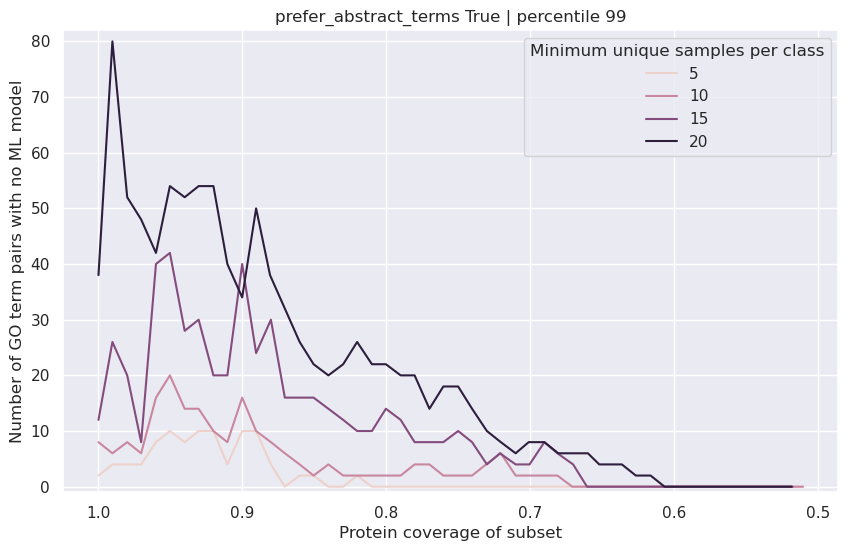

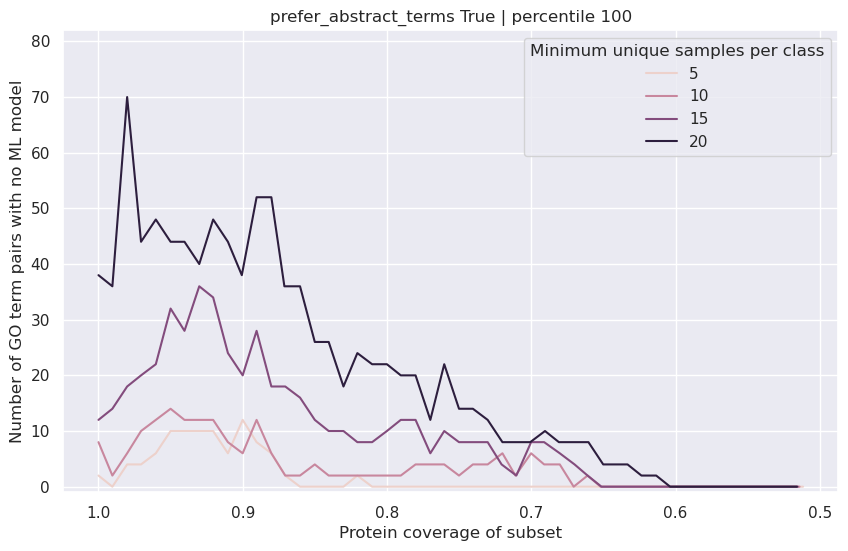

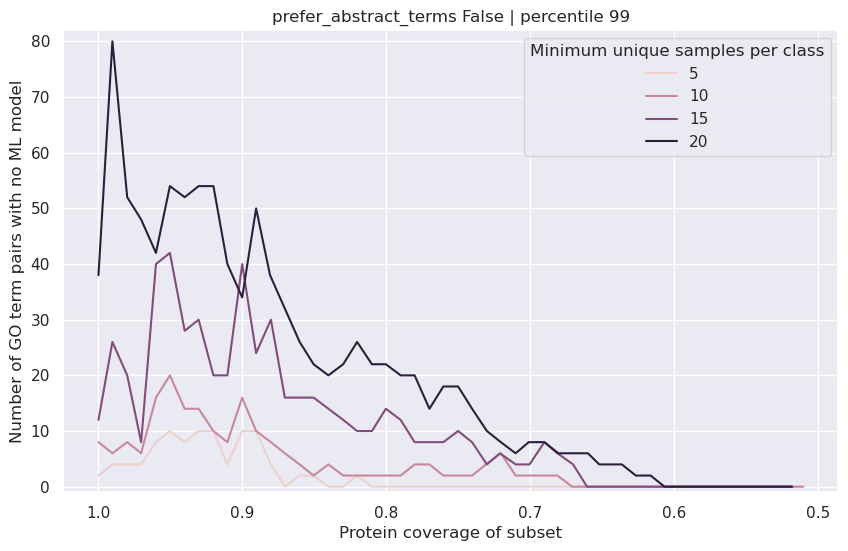

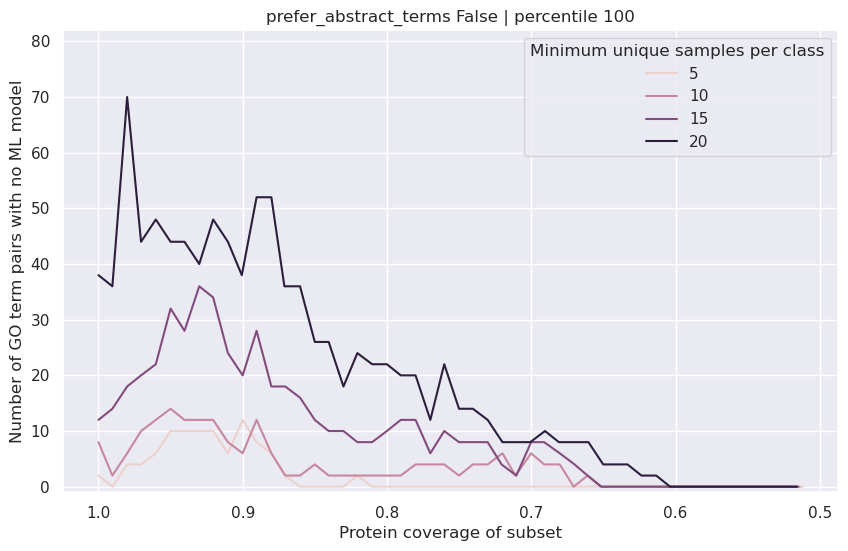

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for prefer_abstract_terms in [True, False]:
    for percentile in [99, 100]:
        g = sns.lineplot(
            df_plot[
                (df_plot.prefer_abstract_terms == prefer_abstract_terms)
                & (df_plot.max_samples_percentile == percentile)
            ],
            x="coverage",
            y="nans",
            hue="min_unique_samples_per_term",
        )
        g.invert_xaxis()
        g.set_ylim((-1, df_plot.nans.max() + 2))
        g.set_ylabel("Number of GO term pairs with no ML model")
        g.set_xlabel("Protein coverage of subset")
        g.set_title(
            f"prefer_abstract_terms {prefer_abstract_terms} | percentile {percentile}"
        )
        g.legend(title="Minimum unique samples per class")
        plt.show()

Coverage vs. mean F1 score

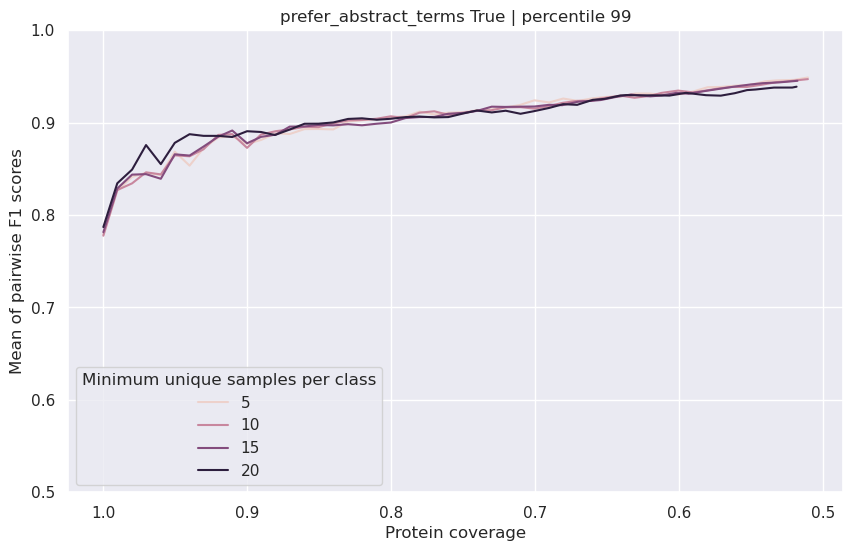

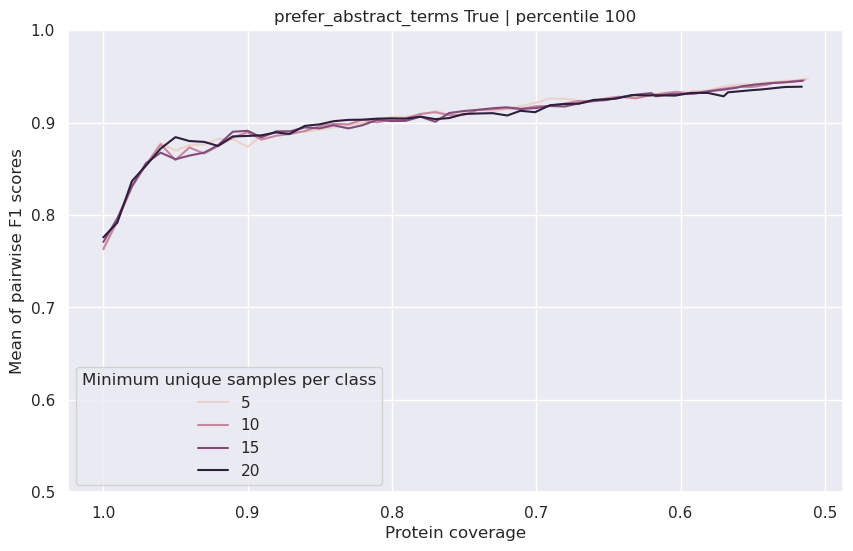

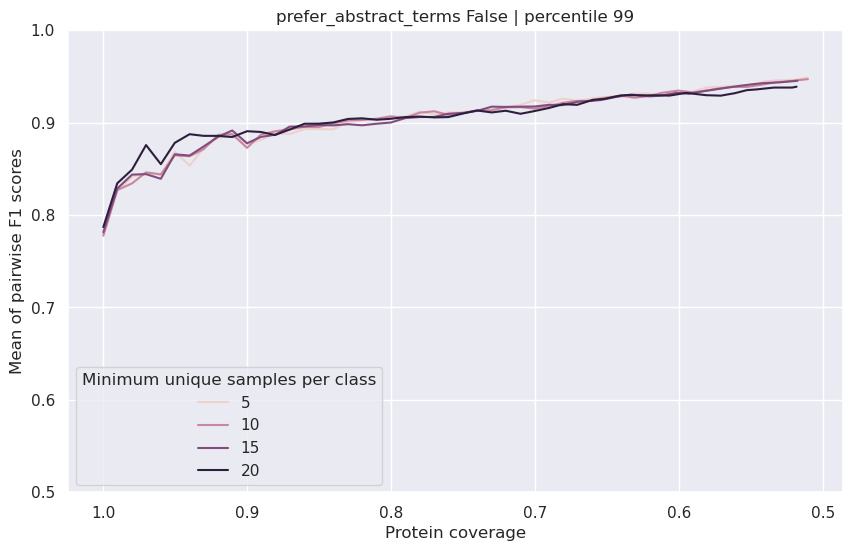

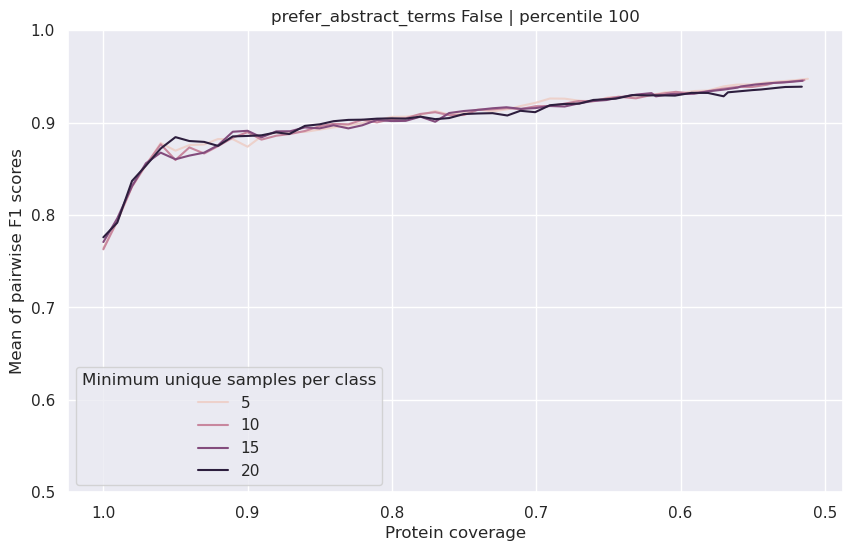

In [16]:
for prefer_abstract_terms in [True, False]:
    for percentile in [99, 100]:
        g = sns.lineplot(
            df_plot[
                (df_plot.prefer_abstract_terms == prefer_abstract_terms)
                & (df_plot.max_samples_percentile == percentile)
            ],
            x="coverage",
            y="mean",
            hue="min_unique_samples_per_term",
        )
        g.invert_xaxis()
        g.set_xlabel("Protein coverage")
        g.set_ylabel("Mean of pairwise F1 scores")
        g.legend(title="Minimum unique samples per class")
        g.set_ylim((0.5, 1))

        g.set_title(
            f"prefer_abstract_terms {prefer_abstract_terms} | percentile {percentile}"
        )
        plt.show()

Coverage vs median f1 score

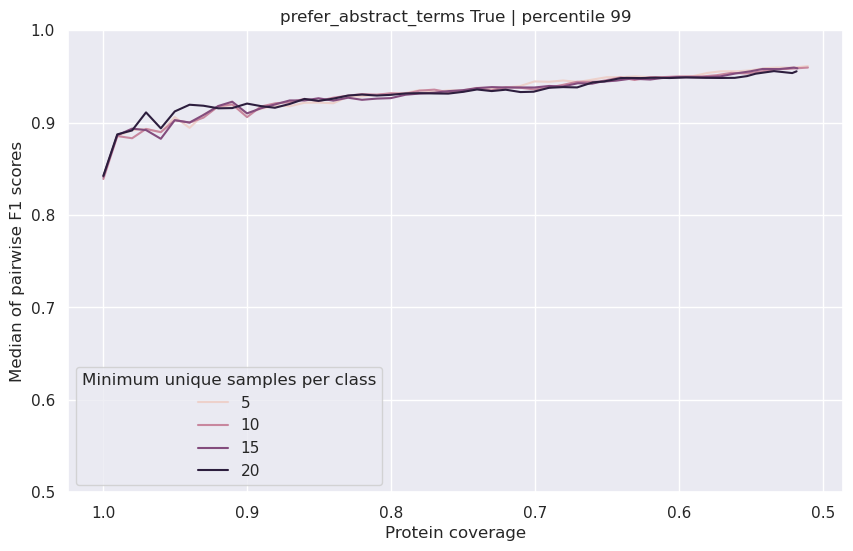

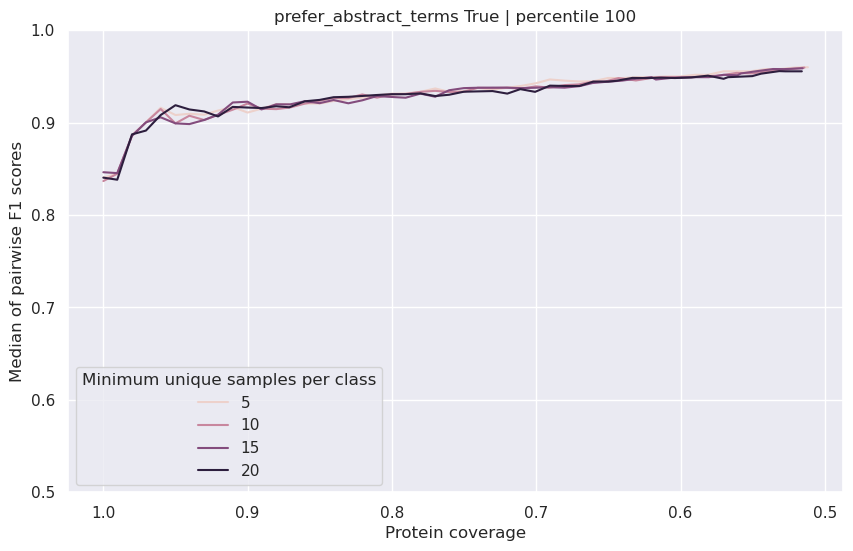

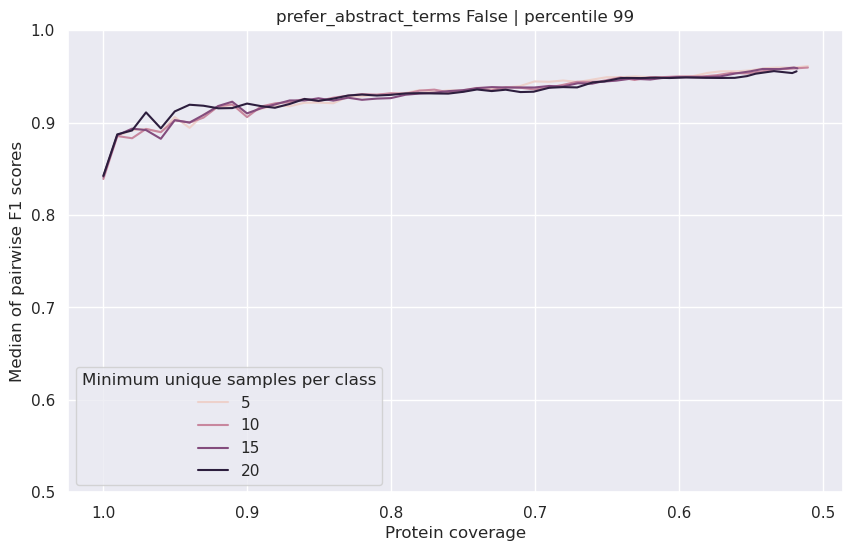

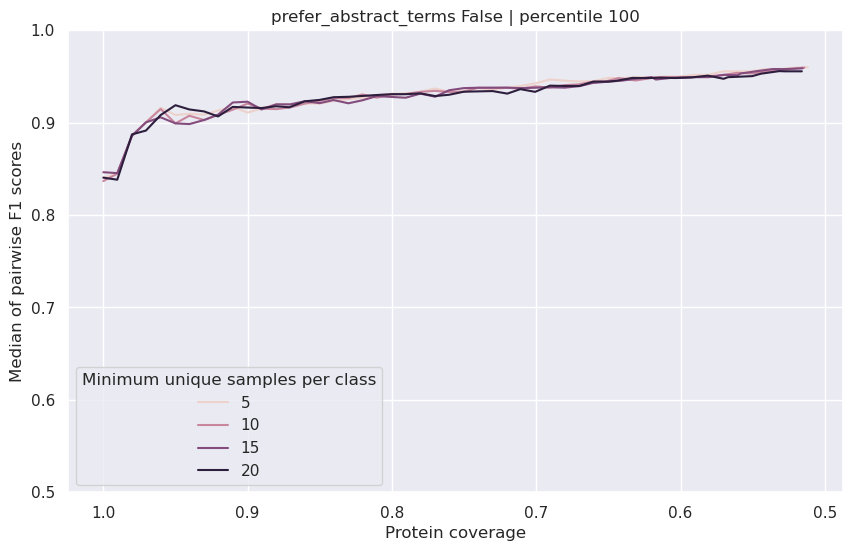

In [17]:
for prefer_abstract_terms in [True, False]:
    for percentile in [99, 100]:
        g = sns.lineplot(
            df_plot[
                (df_plot.prefer_abstract_terms == prefer_abstract_terms)
                & (df_plot.max_samples_percentile == percentile)
            ],
            x="coverage",
            y="median",
            hue="min_unique_samples_per_term",
        )
        g.invert_xaxis()
        g.set_xlabel("Protein coverage")
        g.set_ylabel("Median of pairwise F1 scores")
        g.legend(title="Minimum unique samples per class")
        g.set_ylim((0.5, 1))

        g.set_title(
            f"prefer_abstract_terms {prefer_abstract_terms} | percentile {percentile}"
        )
        plt.show()

Coverage vs. subset length vs min_unique_samples

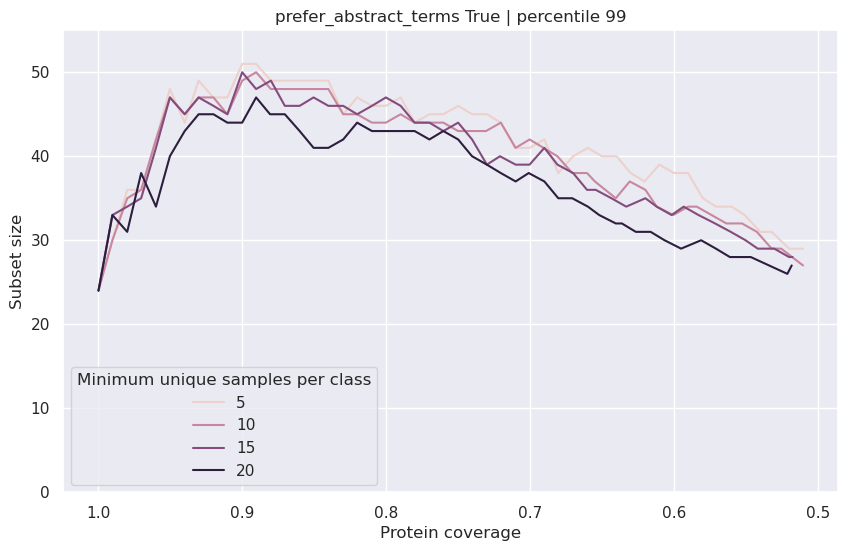

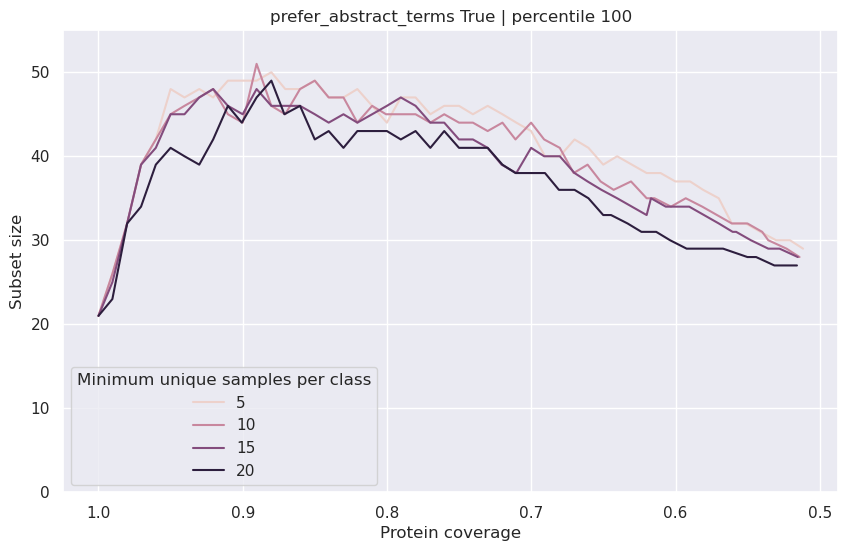

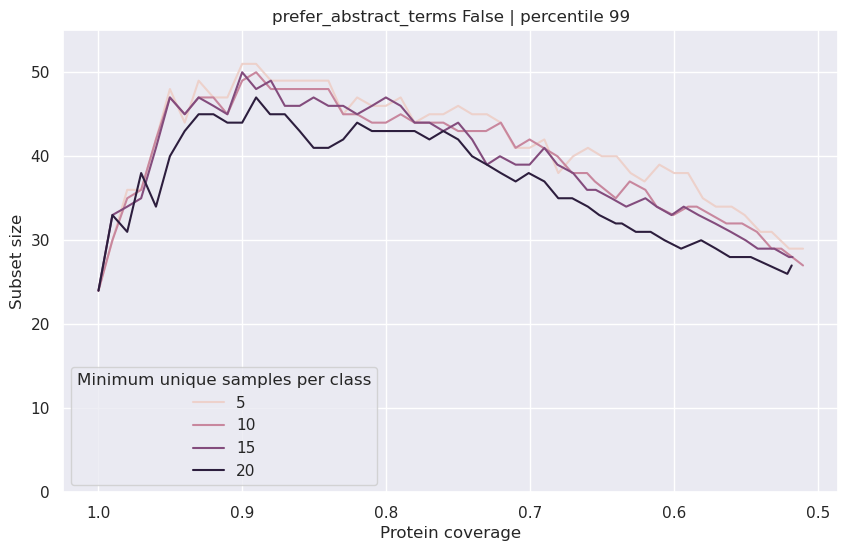

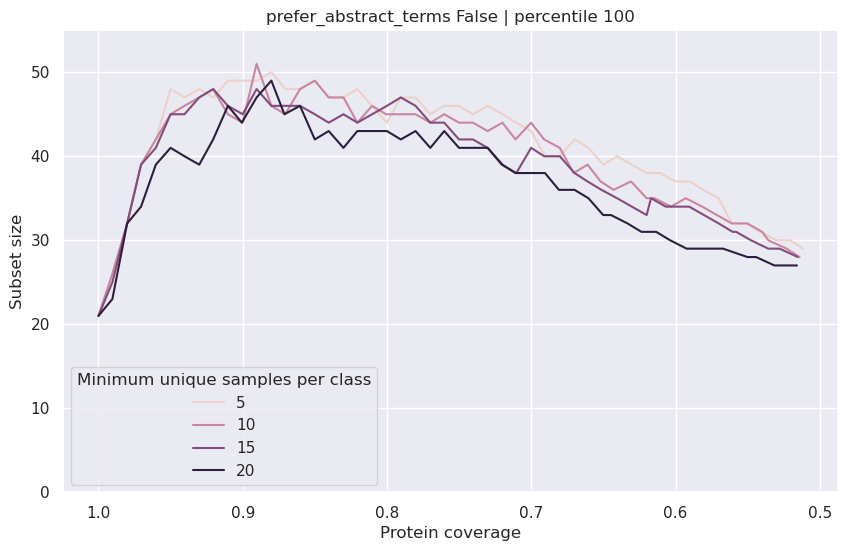

In [18]:
for prefer_abstract_terms in [True, False]:
    for percentile in [99, 100]:
        g = sns.lineplot(
            df_plot[
                (df_plot.prefer_abstract_terms == prefer_abstract_terms)
                & (df_plot.max_samples_percentile == percentile)
            ],
            x="coverage",
            y="subset_length",
            hue="min_unique_samples_per_term",
        )
        g.invert_xaxis()
        g.set_ylim((0, 55))
        g.set_xlabel("Protein coverage")
        g.set_ylabel("Subset size")
        g.legend(title="Minimum unique samples per class")

        g.set_title(
            f"prefer_abstract_terms {prefer_abstract_terms} | percentile {percentile}"
        )
        plt.show()

At a coverage of 100%, we have few terms (around 20) that are very abstract. This leads to low scores, and many pairs with too much overlap to train a ML model (i.e. many NaNs). With lowerering coverage we get more go terms in the subset, the maximum is at 90% coverage at around 45-50 terms. This means we are removing the most abstract terms first, and replace them each with several terms that have fewer proteins. This also improves the average pairwise scores. Only at a coverage of around 50%-60% do we get good F1 scores, along with no NaNs. At less than 90% coverage, the subset sizes become lower again, approaching a length of 25 at 50% coverage. 

One idea to improve the results was to remove the abstract terms before applying the pipeline, in order to potentially get higher scores at a coverage above 95%. 

First, we tried to remove the terms with the most samples before applying the pipeline, similar to how we are removing the terms with less than 20 proteins. Instead of removing all GO terms with more than a fixed number of proteins, we looked at the distribution of protein counts across the GO terms, and removed the 1% of GO terms with the most proteins. The 99th percentile was at 454.44 proteins, while the highest number of proteins for any GO term was 815. This approach removed seven GO terms from the dataset. Removing the seven proteins did not have a major impact on the results. The 95th percentile of protein counts was 110.6 proteins, and 35 terms were removed.

The second idea was to increase scores at a high coverage was to remove proteins with a low maximum level beforehand. The maximum level refers to the highest distance between any GO term the protein is annotated with, and the root node in the GO graph. Proteins with a lower maximum level are the reason why abstract terms such as *active transport* have to remain in the dataset in order to achieve full coverage of all proteins.

Third, the dataset itself might be too diverse. How would removing prokaryotes impact the number of GO terms, for example? 

In [ ]:
# TODO rerun plots above, include 95th percentile.

# TODO rerun this notebook and filter proteins with max level beforehand

# TODO rerun copy of this notebook without ecoli

99th percentile: 454.4399999999987
max 815
terms with lower count 688
would remove 7
95th percentile: 110.59999999999991
max 815
terms with lower count 660
would remove 35


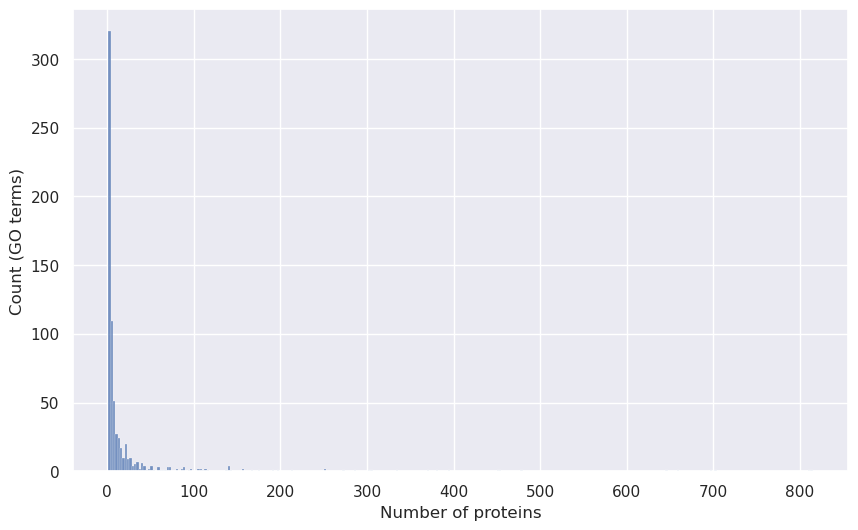

Text(0, 0.5, 'Count (GO terms)')

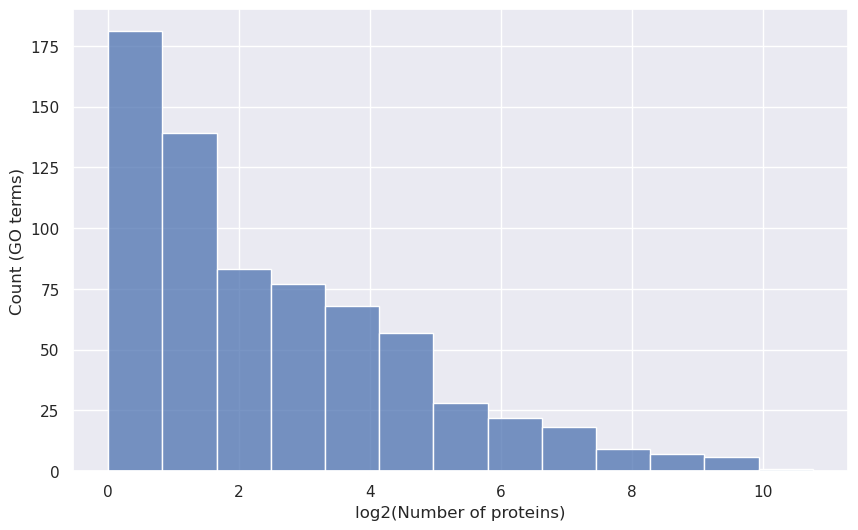

In [88]:
# Removing root node, since all are annotated with that anyway and it gets removed by pipeline
protein_counts = [
    len(proteins)
    for go_id, proteins in go_id_to_proteins.items()
    if go_id != "GO:0022857"
]

print("99th percentile:", np.percentile(protein_counts, 99))
print("max", np.max(protein_counts))
print(
    "terms with lower count",
    len(
        [
            protein_count
            for protein_count in protein_counts
            if protein_count <= np.percentile(protein_counts, 99)
        ]
    ),
)
print(
    "would remove",
    len(
        [
            protein_count
            for protein_count in protein_counts
            if protein_count > np.percentile(protein_counts, 99)
        ]
    ),
)

print("95th percentile:", np.percentile(protein_counts, 95))
print("max", np.max(protein_counts))
print(
    "terms with lower count",
    len(
        [
            protein_count
            for protein_count in protein_counts
            if protein_count <= np.percentile(protein_counts, 95)
        ]
    ),
)
print(
    "would remove",
    len(
        [
            protein_count
            for protein_count in protein_counts
            if protein_count > np.percentile(protein_counts, 95)
        ]
    ),
)

g = sns.histplot(protein_counts)

g.set_xlabel("Number of proteins")
g.set_ylabel("Count (GO terms)")
plt.show()

g = sns.histplot(
    [np.log2(len(proteins)) for go_id, proteins in go_id_to_proteins.items()]
)

g.set_xlabel("log2(Number of proteins)")
g.set_ylabel("Count (GO terms)")


Percentile did not have indended effect. 

idea: try other parameters

idea: Max level for proteins.

idea: Only eukaryotes, for example. 

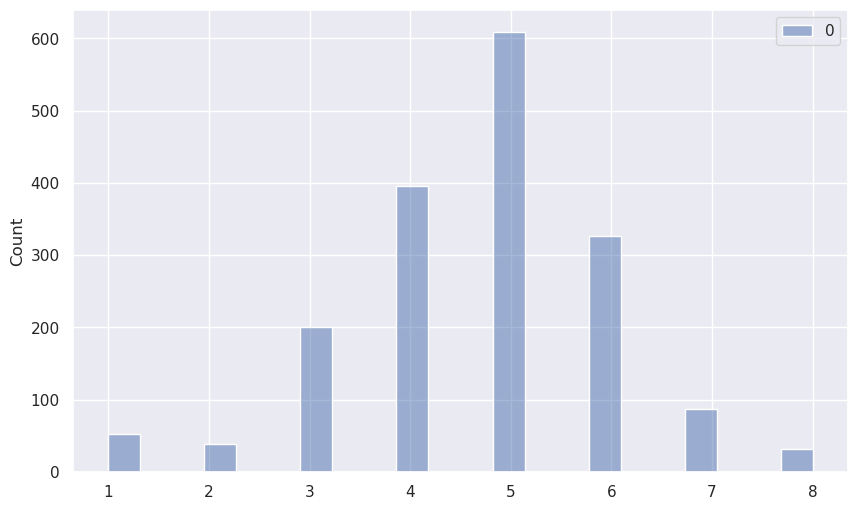

In [89]:
from subpred.go_redundancy import get_go_id_to_level

go_id_to_level = get_go_id_to_level(df_uniprot_goa.go_id_ancestor.unique())
protein_to_go_ids = (
    df_uniprot_goa[["Uniprot", "go_id_ancestor"]]
    .groupby("Uniprot")
    .agg(set)
    .go_id_ancestor.to_dict()
)
protein_to_maxlevel = {
    protein: max({go_id_to_level[go_id] for go_id in go_ids})
    for protein, go_ids in protein_to_go_ids.items()
}
sns.set_theme(rc={"figure.figsize": (10, 6)})
sns.histplot(protein_to_maxlevel.values())
plt.show()

In [59]:
proteins_level = {
    protein for protein, maxlevel in protein_to_maxlevel.items() if maxlevel >= 5
}

df_uniprot_goa_level = df_uniprot_goa[df_uniprot_goa.Uniprot.isin(proteins_level)]
df_sequences_level = df_sequences[df_sequences.index.isin(df_uniprot_goa_level.Uniprot)]

In [61]:
# TODO what is the best subset for uniprot dataset? This is not it

best_subset, best_subset_scores = subset_pipeline(
    df_uniprot_goa=df_uniprot_goa_level2,
    df_sequences=df_sequences_level2,
    min_samples_per_term=20,
    max_samples_percentile=99,
    epsilon_f1=0.00,
    nan_value=-1.0,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    dataset_name="uniprot",
    return_baseline_scores=False,
    min_unique_samples_per_term=5,
    min_coverage=0.99,
    prefer_abstract_terms=False,
)


go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

# sorted([(go_id_to_term[go_id], len(go_id_to_proteins[go_id])) for go_id in best_subset])

print(best_subset_scores)

tmp = pd.DataFrame.from_records(
    sorted(
        [(go_id_to_term[go_id], len(go_id_to_proteins[go_id])) for go_id in best_subset]
    ),
    columns=["GO term", "Proteins"],
).set_index("GO term")
display(tmp)
print(tmp.to_latex())

coverage          0.990503
mean              0.881981
median            0.916933
std               0.113362
nans              6.000000
subset_length    34.000000
dtype: float64


,Proteins
GO term,
ABC-type transporter activity,51
L-amino acid transmembrane transporter activity,116
P-type transmembrane transporter activity,40
acidic amino acid transmembrane transporter activity,23
aromatic amino acid transmembrane transporter activity,31
basic amino acid transmembrane transporter activity,38
calcium activated cation channel activity,26
calcium channel activity,108
carbohydrate:monoatomic cation symporter activity,47


\begin{tabular}{lr}
\toprule
 & Proteins \\
GO term &  \\
\midrule
ABC-type transporter activity & 51 \\
L-amino acid transmembrane transporter activity & 116 \\
P-type transmembrane transporter activity & 40 \\
acidic amino acid transmembrane transporter activity & 23 \\
aromatic amino acid transmembrane transporter activity & 31 \\
basic amino acid transmembrane transporter activity & 38 \\
calcium activated cation channel activity & 26 \\
calcium channel activity & 108 \\
carbohydrate:monoatomic cation symporter activity & 47 \\
dicarboxylic acid transmembrane transporter activity & 45 \\
excitatory extracellular ligand-gated monoatomic ion channel activity & 25 \\
inorganic anion transmembrane transporter activity & 156 \\
intracellular ligand-gated monoatomic ion channel activity & 30 \\
leak channel activity & 20 \\
magnesium ion transmembrane transporter activity & 21 \\
mechanosensitive monoatomic ion channel activity & 22 \\
metal cation:monoatomic cation antiporter activity &

In [23]:
# The optimal subset:
# display(
#     df_plot_concrete[
#         (df_plot_concrete.min_unique_samples_per_term == 10)
#         & (df_plot_concrete.min_coverage == 0.98)
#     ].sort_values("coverage", ascending=False)
# )

# TODO what is the best subset for uniprot dataset? This is not it

best_subset, best_subset_scores = subset_pipeline(
    df_uniprot_goa=df_uniprot_goa,
    df_sequences=df_sequences,
    min_samples_per_term=20,
    max_samples_percentile=100,
    epsilon_f1=0.00,
    nan_value=-1.0,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    dataset_name="uniprot",
    return_baseline_scores=False,
    min_unique_samples_per_term=5,
    min_coverage=0.99,
    prefer_abstract_terms=False,
)


go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

# sorted([(go_id_to_term[go_id], len(go_id_to_proteins[go_id])) for go_id in best_subset])

print(best_subset_scores)

tmp = pd.DataFrame.from_records(
    sorted(
        [(go_id_to_term[go_id], len(go_id_to_proteins[go_id])) for go_id in best_subset]
    ),
    columns=["GO term", "Proteins"],
).set_index("GO term")
display(tmp)
print(tmp.to_latex())

coverage          0.990367
mean              0.792771
median            0.844721
std               0.170199
nans              0.000000
subset_length    26.000000
dtype: float64


,Proteins
GO term,
ATPase-coupled transmembrane transporter activity,197
amide transmembrane transporter activity,104
amino acid transmembrane transporter activity,168
azole transmembrane transporter activity,22
carbohydrate derivative transmembrane transporter activity,104
carbohydrate transmembrane transporter activity,138
channel activity,452
dicarboxylic acid transmembrane transporter activity,45
efflux transmembrane transporter activity,48


\begin{tabular}{lr}
\toprule
 & Proteins \\
GO term &  \\
\midrule
ATPase-coupled transmembrane transporter activity & 197 \\
amide transmembrane transporter activity & 104 \\
amino acid transmembrane transporter activity & 168 \\
azole transmembrane transporter activity & 22 \\
carbohydrate derivative transmembrane transporter activity & 104 \\
carbohydrate transmembrane transporter activity & 138 \\
channel activity & 452 \\
dicarboxylic acid transmembrane transporter activity & 45 \\
efflux transmembrane transporter activity & 48 \\
inorganic anion transmembrane transporter activity & 156 \\
macromolecule transmembrane transporter activity & 80 \\
magnesium ion transmembrane transporter activity & 21 \\
monocarboxylic acid transmembrane transporter activity & 90 \\
nucleobase transmembrane transporter activity & 30 \\
nucleotide transmembrane transporter activity & 44 \\
organic cation transmembrane transporter activity & 60 \\
organic hydroxy compound transmembrane transporter acti

In [24]:
import numpy as np
from subpred.overlap_matrix import get_go_overlap_matrix, plot_go_overlap_matrix

df_go_overlaps = get_go_overlap_matrix(
    df_uniprot_goa=df_uniprot_goa, exclude_iea=EXCLUDE_IEA_GO_TERMS
)

sns.set_theme(rc={"figure.figsize": (24, 12)})


def get_overlap_plot(subset, df_go_overlaps=df_go_overlaps, filename=None):
    # the percentage of proteins annotated with GO term 1 (x axis) that is also annotated with GO term2
    best_subset_overlaps = df_go_overlaps.loc[subset, subset].rename(
        columns=go_id_to_term, index=go_id_to_term
    )
    best_subset_overlaps = best_subset_overlaps.loc[
        sorted(best_subset_overlaps.index), sorted(best_subset_overlaps.columns)
    ]

    best_subset_overlaps = best_subset_overlaps / np.diag(best_subset_overlaps)

    tmp = best_subset_overlaps.copy()
    np.fill_diagonal(tmp.values, 0)
    print("median", tmp.median(axis=None).round(2))
    print("mean", tmp.mean(axis=None).round(2))

    g = sns.heatmap(best_subset_overlaps, annot=True, fmt=".2f")
    g.set_xlabel("GO term 1")
    g.set_ylabel("GO term 2")
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches="tight")
    return g

median 0.02
mean 0.06


<Axes: xlabel='GO term 1', ylabel='GO term 2'>

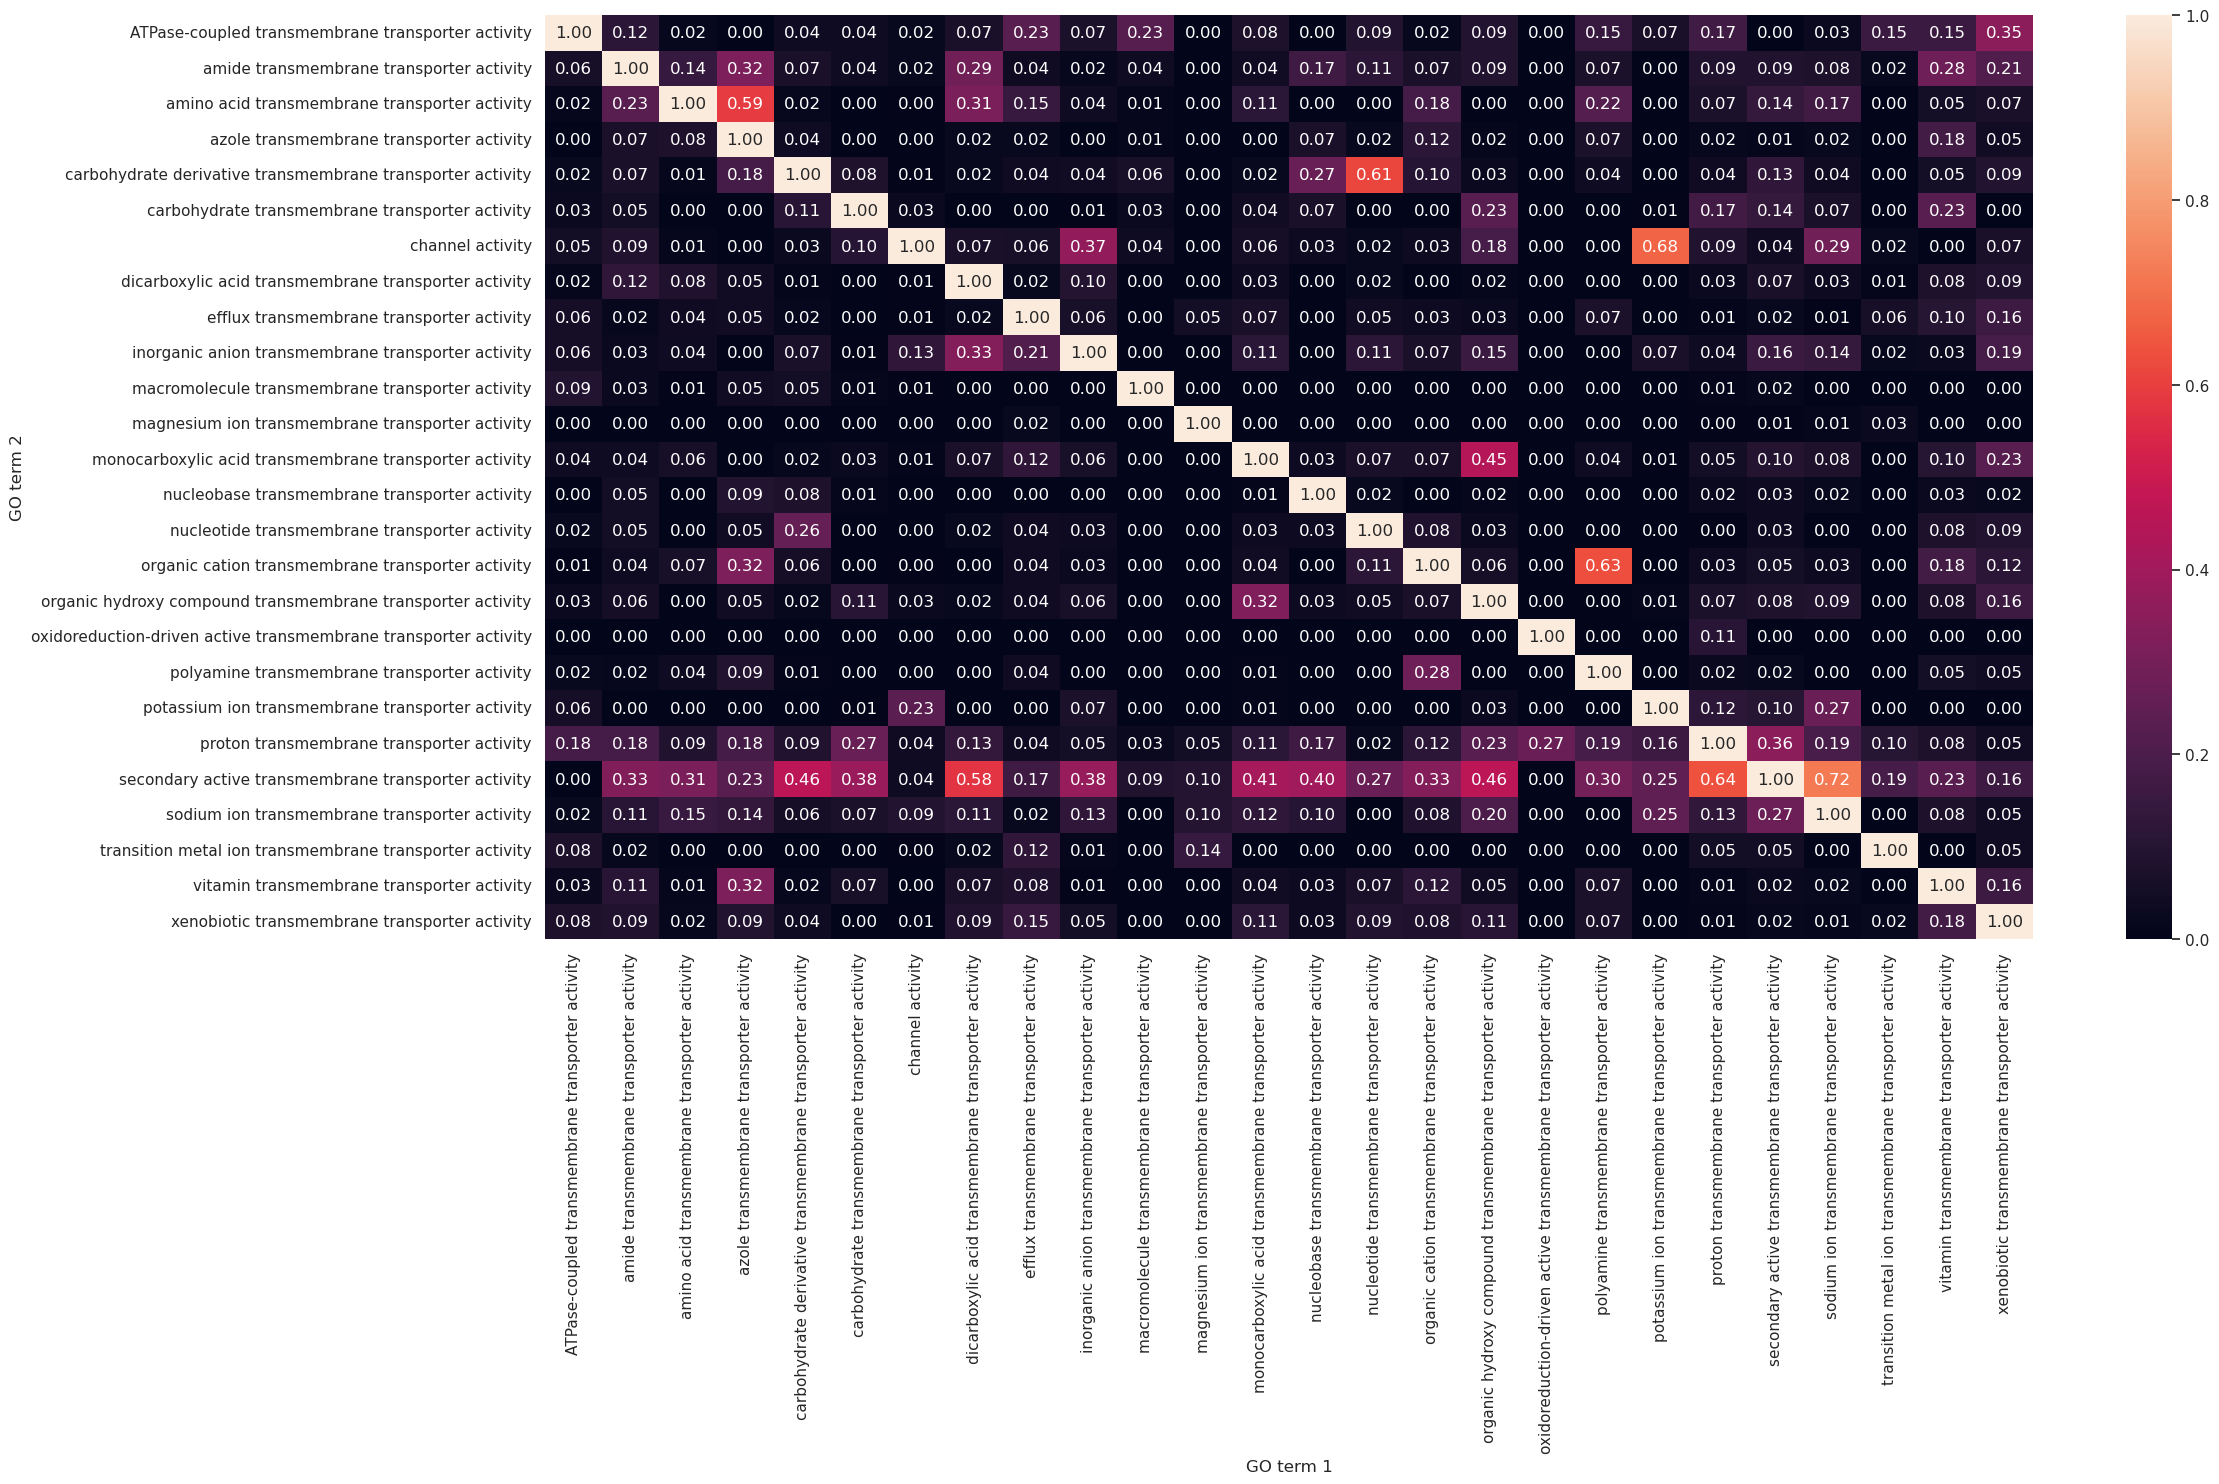

In [25]:
get_overlap_plot(best_subset, filename="overlaps-concrete.png")

What about the other parameters? Can optimizing all other parameters (except min_coverage) improve results?